# 정규화(원핫 인코딩 + 표준화)
## plant 데이터 prepocessing

In [6]:
import pandas as pd
import missingno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import module.etl as etl
pd.options.display.max_columns = 999

In [7]:
plant = pd.read_csv("data/31.finaldata_plant/plant_weather_sea.csv")
plant

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM
0,2016-04-01 00:00:00,1,1,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-8.790313,7.00,5.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0
1,2016-04-01 00:00:00,1,2,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-9.332252,5.00,3.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0
2,2016-04-01 00:00:00,1,3,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-5.933778,4.00,3.00,1013.3,1016.0,0.0,7.750,0.475,0.900,128.30,1.200,142.725,143.0,2.0,2.6,1015.5,72.0,8.4,0.0,0.0,78.0,0.8,60.0,4.0,9.0,1015.7,55.0
3,2016-04-01 03:00:00,1,1,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-7.667883,7.00,4.00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0
4,2016-04-01 03:00:00,1,2,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-6.809490,5.00,3.00,1012.2,1014.9,0.0,5.625,0.525,0.975,164.25,1.500,142.750,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,228.0,0.3,10.0,4.0,9.8,1015.0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
349312,2019-03-31 23:40:00,2,2,9.02,38.49,9.68,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.778235,4.55,-0.66,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0
349313,2019-03-31 23:40:00,2,3,8.26,39.62,9.57,4.47,53.14,0.0,2019-04-01 23:40:00,0.0,2019-04-02 23:40:00,0.0,-3.490602,3.79,-1.31,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0
349314,2019-03-31 23:50:00,1,1,10.49,38.74,10.52,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-2.940403,4.15,-0.03,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0
349315,2019-03-31 23:50:00,1,2,10.55,36.69,11.01,6.34,45.94,0.0,2019-04-01 23:50:00,0.0,2019-04-02 23:50:00,0.0,-3.232477,4.21,-0.46,1021.1,1023.6,0.0,3.500,2.725,3.375,287.70,5.775,298.125,335.0,8.0,10.3,1023.7,57.0,5.6,2.0,0.0,299.0,8.2,313.0,14.0,5.0,1023.2,46.0


## 정규화 할 list 나누기

In [8]:
dummy_list = []
caling_list= ["AVG_PA", "AVG_PS", "HR1_RN", "AVG_TA", "AVG_WS", "MAX_WS", "MAX_WS_WD", "MAX_INS_WS", "MAX_INS_WS_WD", "WD_N1", "WS_N1", "GUST_WS_N1", "PA", "BUOY_HM", "BUOY_TA", "MAX_WH", "AVG_WH", "LB_WD", "LB_WS", "LB_MAX_INS_WD", "LB_MAX_IWS", "LB_TA", "LB_PS", "LB_HM"]

In [9]:
caling_list.extend(["DEW_POINT_COIL", "IN_OUT_TEM_D", "IN_COIL_TEM_D"])
caling_list

['AVG_PA',
 'AVG_PS',
 'HR1_RN',
 'AVG_TA',
 'AVG_WS',
 'MAX_WS',
 'MAX_WS_WD',
 'MAX_INS_WS',
 'MAX_INS_WS_WD',
 'WD_N1',
 'WS_N1',
 'GUST_WS_N1',
 'PA',
 'BUOY_HM',
 'BUOY_TA',
 'MAX_WH',
 'AVG_WH',
 'LB_WD',
 'LB_WS',
 'LB_MAX_INS_WD',
 'LB_MAX_IWS',
 'LB_TA',
 'LB_PS',
 'LB_HM',
 'DEW_POINT_COIL',
 'IN_OUT_TEM_D',
 'IN_COIL_TEM_D']

In [10]:
plant = etl.preprosess(plant, caling_list, dummy_list)
plant.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D']
dummy_category: ['PLANT', 'LOC']


,MEA_DDHR,COND_LOC,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.265315,1.518995,2.696145,1,0,1,0,0
1,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.312175,0.804837,1.511720,1,0,0,1,0
2,2016-04-01 00:00:00,0.0,2016-04-02 00:00:00,0.0,2016-04-03 00:00:00,0.0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.018322,0.447758,1.511720,1,0,0,0,1
3,2016-04-01 03:00:00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.168263,1.518995,2.103933,1,0,1,0,0
4,2016-04-01 03:00:00,0.0,2016-04-02 03:00:00,0.0,2016-04-03 03:00:00,0.0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.094041,0.804837,1.511720,1,0,0,1,0


## test_data validation &정규화 preprosessing

In [11]:
test_data = pd.read_csv("data/31.finaldata_plant/test_weather_sea.csv")
test_data

,MEA_DDHR,PLANT,LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM
0,2019-04-01 00:00:00,2,3,8.17,40.42,10.10,4.20,54.82,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-2.746664,3.97,-1.93,1021.200000,1023.7,0.0,3.150000,2.125000,2.550,269.325000,4.250000,283.350000,336.0,7.0,9.9,1023.8,57.0,5.4,2.0,0.0,298.0,7.6,313.0,14.0,5.0,1023.2,50.0
1,2019-04-01 04:30:00,1,2,10.03,48.81,10.79,6.09,59.34,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,0.451055,3.94,-0.76,1021.633333,1024.1,0.0,4.958333,2.791667,3.275,288.208333,5.533333,274.216667,346.0,6.0,8.3,1023.1,64.0,5.3,1.0,0.0,305.0,6.9,300.0,9.0,5.0,1022.9,62.0
2,2019-04-01 10:30:00,2,3,9.45,40.93,9.07,12.26,32.14,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-3.505440,-2.81,0.38,1022.066667,1024.5,0.0,6.766667,3.458333,4.000,307.091667,6.816667,265.083333,11.0,3.0,4.0,1025.3,65.0,6.0,1.0,0.0,326.0,4.5,300.0,9.0,5.4,1025.0,47.0
3,2019-04-01 11:00:00,1,1,12.32,34.13,10.86,12.32,28.27,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-4.329266,0.00,1.46,1022.500000,1024.9,0.0,8.575000,4.125000,4.725,325.975000,8.100000,255.950000,27.0,2.0,3.3,1025.2,65.0,6.1,1.0,0.0,325.0,3.3,300.0,9.0,5.6,1024.9,46.0
4,2019-04-01 13:30:00,2,1,11.28,22.65,8.76,12.01,19.84,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-11.413783,-0.73,2.52,1021.100000,1023.5,0.0,8.837500,4.075000,4.775,304.662500,7.850000,279.862500,272.0,2.0,4.0,1024.0,58.0,6.3,0.0,0.0,227.0,3.1,300.0,9.0,6.1,1023.6,38.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,10.73,33.36,13.30,6.28,46.37,2020-03-30 03:00:00,NaN,2020-03-31 03:00:00,NaN,-2.487578,4.45,-2.57,1020.500000,1023.0,0.0,1.450000,1.225000,1.400,252.425000,2.175000,263.025000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,345.0,4.2,338.0,8.0,4.8,1022.9,46.0
3535,2020-03-29 05:00:00,2,3,9.15,38.86,11.70,1.39,74.33,2020-03-30 05:00:00,NaN,2020-03-31 05:00:00,NaN,-1.843282,7.76,-2.55,1020.700000,1023.2,0.0,0.175000,0.875000,1.225,163.250000,1.525000,184.275000,15.0,6.0,8.2,1022.9,52.0,6.3,0.0,0.0,5.0,3.5,338.0,8.0,4.2,1023.2,50.0
3536,2020-03-29 07:00:00,2,1,7.10,44.87,9.03,4.26,58.06,2020-03-30 07:00:00,NaN,2020-03-31 07:00:00,NaN,-2.307509,2.84,-1.93,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,29.0,3.3,338.0,8.0,3.9,1023.9,46.0
3537,2020-03-29 11:30:00,1,1,13.54,33.49,12.20,12.90,33.67,2020-03-30 11:30:00,NaN,2020-03-31 11:30:00,NaN,-3.401824,0.64,1.34,1021.300000,1023.8,0.0,-0.500000,1.200000,1.650,179.450000,2.375000,170.900000,23.0,6.0,7.7,1022.9,52.0,6.3,0.0,0.0,149.0,0.9,338.0,8.0,7.2,1023.6,49.0


In [12]:
test = etl.preprosess(test_data,caling_list ,dummy_list)
test.head()

caling_category: ['TEM_IN', 'HUM_IN', 'TEM_COIL', 'TEM_OUT_LOC1', 'HUM_OUT_LOC1', 'AVG_PA', 'AVG_PS', 'HR1_RN', 'AVG_TA', 'AVG_WS', 'MAX_WS', 'MAX_WS_WD', 'MAX_INS_WS', 'MAX_INS_WS_WD', 'WD_N1', 'WS_N1', 'GUST_WS_N1', 'PA', 'BUOY_HM', 'BUOY_TA', 'MAX_WH', 'AVG_WH', 'LB_WD', 'LB_WS', 'LB_MAX_INS_WD', 'LB_MAX_IWS', 'LB_TA', 'LB_PS', 'LB_HM', 'DEW_POINT_COIL', 'IN_OUT_TEM_D', 'IN_COIL_TEM_D']
dummy_category: ['PLANT', 'LOC']


,MEA_DDHR,X24H_TMA,X24H_COND_LOC,X48H_TMA,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,2019-04-01 00:00:00,2019-04-02 00:00:00,NaN,2019-04-03 00:00:00,NaN,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-0.906625,0.598363,-1.476814,0,1,0,0,1
1,2019-04-01 04:30:00,2019-04-02 04:30:00,NaN,2019-04-03 04:30:00,NaN,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.587879,0.586896,-0.764695,1,0,0,1,0
2,2019-04-01 10:30:00,2019-04-02 10:30:00,NaN,2019-04-03 10:30:00,NaN,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-0.982260,-1.993108,-0.070835,0,1,0,0,1
3,2019-04-01 11:00:00,2019-04-02 11:00:00,NaN,2019-04-03 11:00:00,NaN,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.064378,-0.919062,0.586506,1,0,1,0,0
4,2019-04-01 13:30:00,2019-04-02 13:30:00,NaN,2019-04-03 13:30:00,NaN,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758718,-1.395372,-0.796091,-0.446039,-0.16337,0.323276,-0.414470,0.923601,0.243787,-0.696975,0.733814,-2.249699,-1.770558,-1.198084,1.231674,0,1,1,0,0


# 데이터 분류
## plant_train 데이터
### train, test 데이터 분리

In [13]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
plant = plant.drop(timeList, axis=1)

In [14]:
plant.head()

,COND_LOC,X24H_COND_LOC,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_COIL,IN_OUT_TEM_D,IN_COIL_TEM_D,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3
0,0.0,0.0,0.0,-0.036700,-2.057425,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.265315,1.518995,2.696145,1,0,1,0,0
1,0.0,0.0,0.0,-0.237239,-2.129562,-0.486644,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.312175,0.804837,1.511720,1,0,0,1,0
2,0.0,0.0,0.0,-0.337508,-1.480329,-0.585582,-0.416944,-1.060988,-0.229641,-0.211533,-0.147832,-0.372469,-1.241506,-1.255742,-0.963976,-1.340660,-0.751454,-0.429018,-0.748917,-0.860324,-0.296721,-0.038813,-0.363739,-0.627838,-0.278883,-1.169989,-1.281656,-1.297876,-1.091905,-0.277437,-0.246982,-0.805667,-1.018322,0.447758,1.511720,1,0,0,0,1
3,0.0,0.0,0.0,-0.237239,-1.768877,-0.585582,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.168263,1.518995,2.103933,1,0,1,0,0
4,0.0,0.0,0.0,-0.437777,-1.480329,-0.684520,-0.597441,-0.155766,-0.356498,-0.337822,-0.147832,-0.561586,-1.200965,-1.200878,-0.481861,-1.203281,-0.751111,-1.466137,0.673324,0.414466,0.557337,-1.202360,-0.599404,-0.627838,-0.278883,0.214160,-1.450088,-1.739225,-1.091905,-0.197726,-0.327762,-1.413840,-1.094041,0.804837,1.511720,1,0,0,1,0


In [17]:
train_X = plant.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
train24_y = plant[['X24H_COND_LOC']]
train48_y = plant[['X48H_COND_LOC']]

In [18]:
train_y = plant[['X24H_COND_LOC', 'X48H_COND_LOC']]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_X, train_y, test_size=0.3, shuffle=True, random_state=42, stratify=train_y)

In [20]:
y_train24 = y_train[['X24H_COND_LOC']]
y_train48 = y_train[['X48H_COND_LOC']]
y_val24 = y_val[['X24H_COND_LOC']]
y_val48 = y_val[['X48H_COND_LOC']]

In [21]:
from sklearn.model_selection import train_test_split
X_train24, X_val24, y_train24, y_val24 = train_test_split(train_X, train24_y, test_size=0.3, shuffle=True, random_state=42, stratify=train24_y)

In [22]:
from sklearn.model_selection import train_test_split
X_train48, X_val48, y_train48, y_val48 = train_test_split(train_X, train48_y, test_size=0.3, shuffle=True, random_state=42, stratify=train48_y)

### 24시간 후 결로 예상 분류

In [96]:
from sklearn.model_selection import train_test_split
X_train24, X_val24, y_train24, y_val24 = train_test_split(train_X, train24_y, test_size=0.3, shuffle=True, random_state=42)

### 48시간 후 결로 예상 분류

In [97]:
from sklearn.model_selection import train_test_split
X_train48, X_val48, y_train48, y_val48 = train_test_split(train_X, train48_y, test_size=0.3, shuffle=True, random_state=42)

## test_data 만들기

In [23]:
timeList = ['MEA_DDHR', 'X24H_TMA', 'X48H_TMA']
test = test.drop(timeList, axis=1)
test_X = test.drop(['X24H_COND_LOC', 'X48H_COND_LOC'], axis=1)
test24_y = test[['X24H_COND_LOC']]
test48_y = test[['X48H_COND_LOC']]

# 다중공선성 확인 with lightgbm

In [99]:
from lightgbm import LGBMClassifier
lgbm_model24 = LGBMClassifier(n_estimators=100, random_state=42, boost_from_average=False)
lgbm_model24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [68]:
from lightgbm import LGBMClassifier
lgbm_model48 = LGBMClassifier(n_estimators=100, random_state=42, boost_from_average=False)
lgbm_model48.fit(X_train48, y_train48)

LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_leaves=31, objective=None, random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

## 피처 중요도

In [100]:
lgbm_model24_df = pd.DataFrame(data=np.c_[test_X.columns.values, lgbm_model24.feature_importances_], columns=['variable', 'importance'])
lgbm_model24_df.sort_values(by="importance",ascending=False, inplace=True)
lgbm_model24_df

,variable,importance
2,TEM_COIL,188
43,HUM_IN_MIN,177
35,IN_COIL_TEM_D,161
23,LB_WD,126
25,LB_MAX_INS_WD,122
...,...,...
98,WEEK_35,0
99,WEEK_36,0
100,WEEK_37,0
101,WEEK_38,0


In [101]:
corr = test_X.corr()
Abs_corr = pd.DataFrame(abs(corr))
Abs_corr['variable'] = Abs_corr.index
Abs_corr.reset_index(drop=True, inplace=True)
Abs_corr
tmp = Abs_corr[(Abs_corr.variable != lgbm_model24_df.variable[2])].loc[:,['variable',lgbm_model24_df.variable[2]]]
columns = tmp.columns[1]
tmp.sort_values(columns, axis=0, ascending=False, inplace=True)
tmp = tmp[tmp[columns] > 0.45]
tmp

,variable,TEM_COIL
44,TEM_COIL_MIN,0.994451
39,TEM_COIL_MAX,0.993573
42,TEM_IN_MIN,0.985962
0,TEM_IN,0.982430
37,TEM_IN_MAX,0.981184
45,TEM_OUT_LOC1_MIN,0.971715
32,STR_WVP,0.966106
27,LB_TA,0.956237
33,WVP,0.941622
9,AVG_TA,0.928434


In [102]:
finalvar = lgbm_model24_df
j=0

while j < len(lgbm_model24_df.variable):
    tmp = Abs_corr[(Abs_corr.variable != lgbm_model24_df.variable[j])].loc[:,['variable',lgbm_model24_df.variable[j]]]
    tmp.columns = ['variable', 'Pearson']
    tmp.sort_values(['Pearson'], axis=0, ascending=False, inplace=True)
    tmp = tmp[tmp.Pearson > 0.45]

    finalvar = pd.merge(finalvar, tmp, how='left', on='variable')
    finalvar = finalvar.loc[finalvar.isnull()['Pearson'], :]
    finalvar = finalvar.reset_index(drop=True)
    finalvar = finalvar.drop('Pearson', 1)
    finalvar.sort_values(['importance'], axis=0, ascending=False, inplace=True)
    j = j + 1

finalvar #최종선택변수

,variable,importance
0,IN_COIL_TEM_D,161
1,WEEK_48,25
2,WEEK_9,12
3,WEEK_5,10
4,HOUR_17,4
5,WEEK_45,3
6,HOUR_19,3
7,HOUR_13,2
8,HOUR_20,2
9,HOUR_1,2


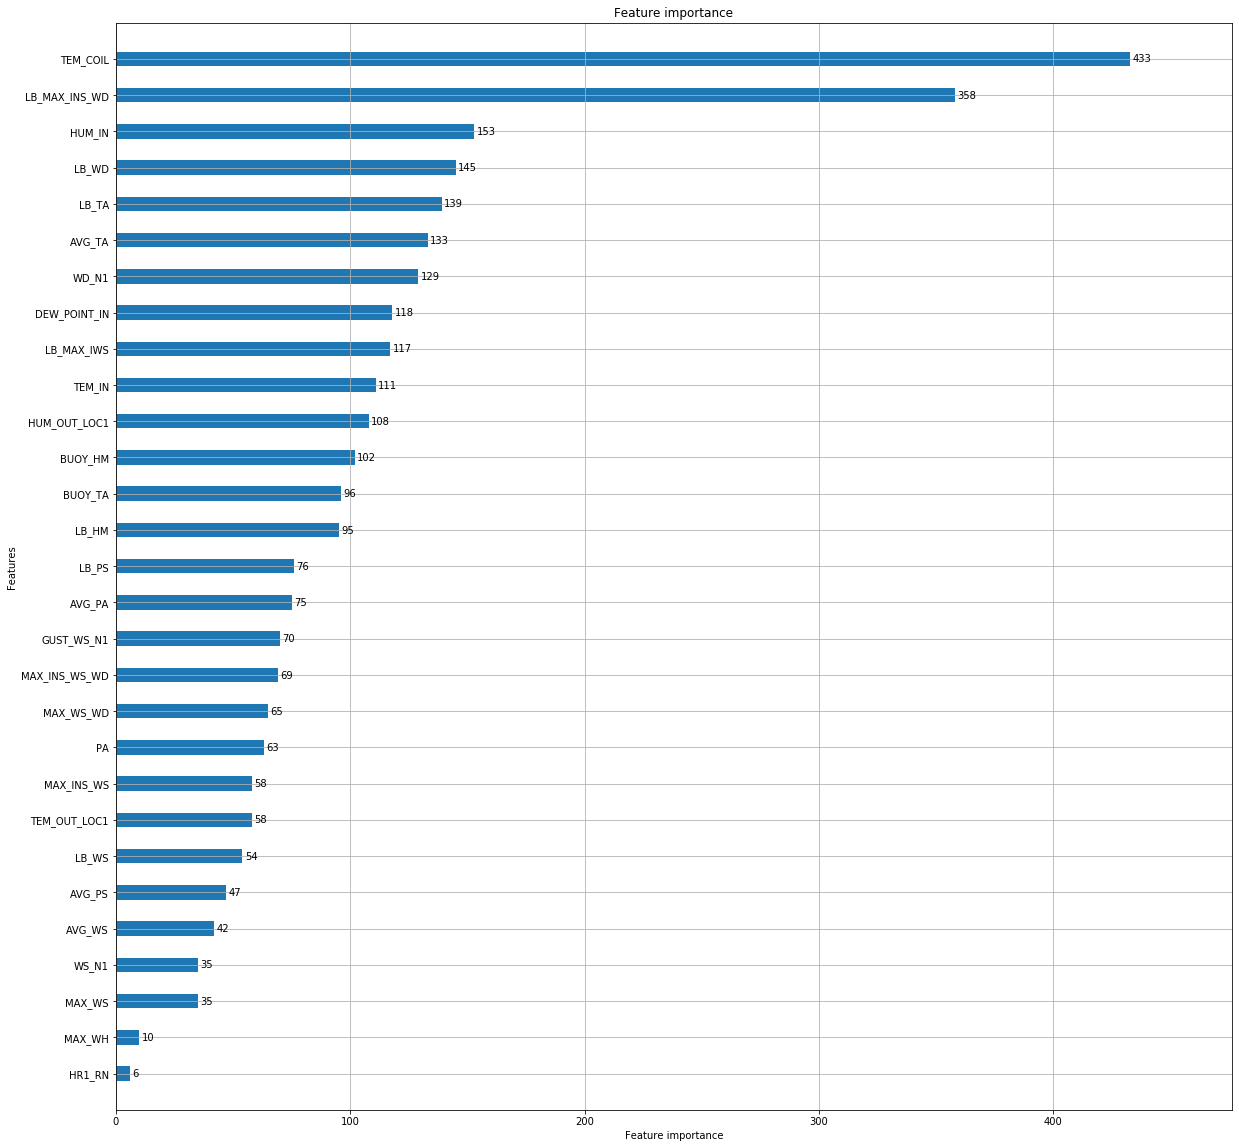

In [84]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(lgbm_model24, ax=ax,  max_num_features=30,height=0.4)

# Random Forest
## 24 시간 결로 예측

In [103]:
from sklearn.ensemble import RandomForestClassifier
rf_model24 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [104]:
y_pred24 = rf_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104215
         1.0       0.91      0.84      0.87       581

    accuracy                           1.00    104796
   macro avg       0.95      0.92      0.93    104796
weighted avg       1.00      1.00      1.00    104796



In [105]:
imp_rf24_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model24.feature_importances_], columns=['variable', 'importance'])
imp_rf24_df.sort_values(by='importance', ascending=False, inplace=True)

In [106]:
imp_rf24_df.head(30)

,variable,importance
35,IN_COIL_TEM_D,0.0397814
2,TEM_COIL,0.0377128
36,IN_OUT_HUM_D,0.0303493
27,LB_TA,0.0301367
20,BUOY_TA,0.0289378
43,HUM_IN_MIN,0.0284403
31,DEW_POINT_COIL,0.0278542
1,HUM_IN,0.0271938
46,HUM_OUT_LOC1_MIN,0.0267466
34,IN_OUT_TEM_D,0.0261896


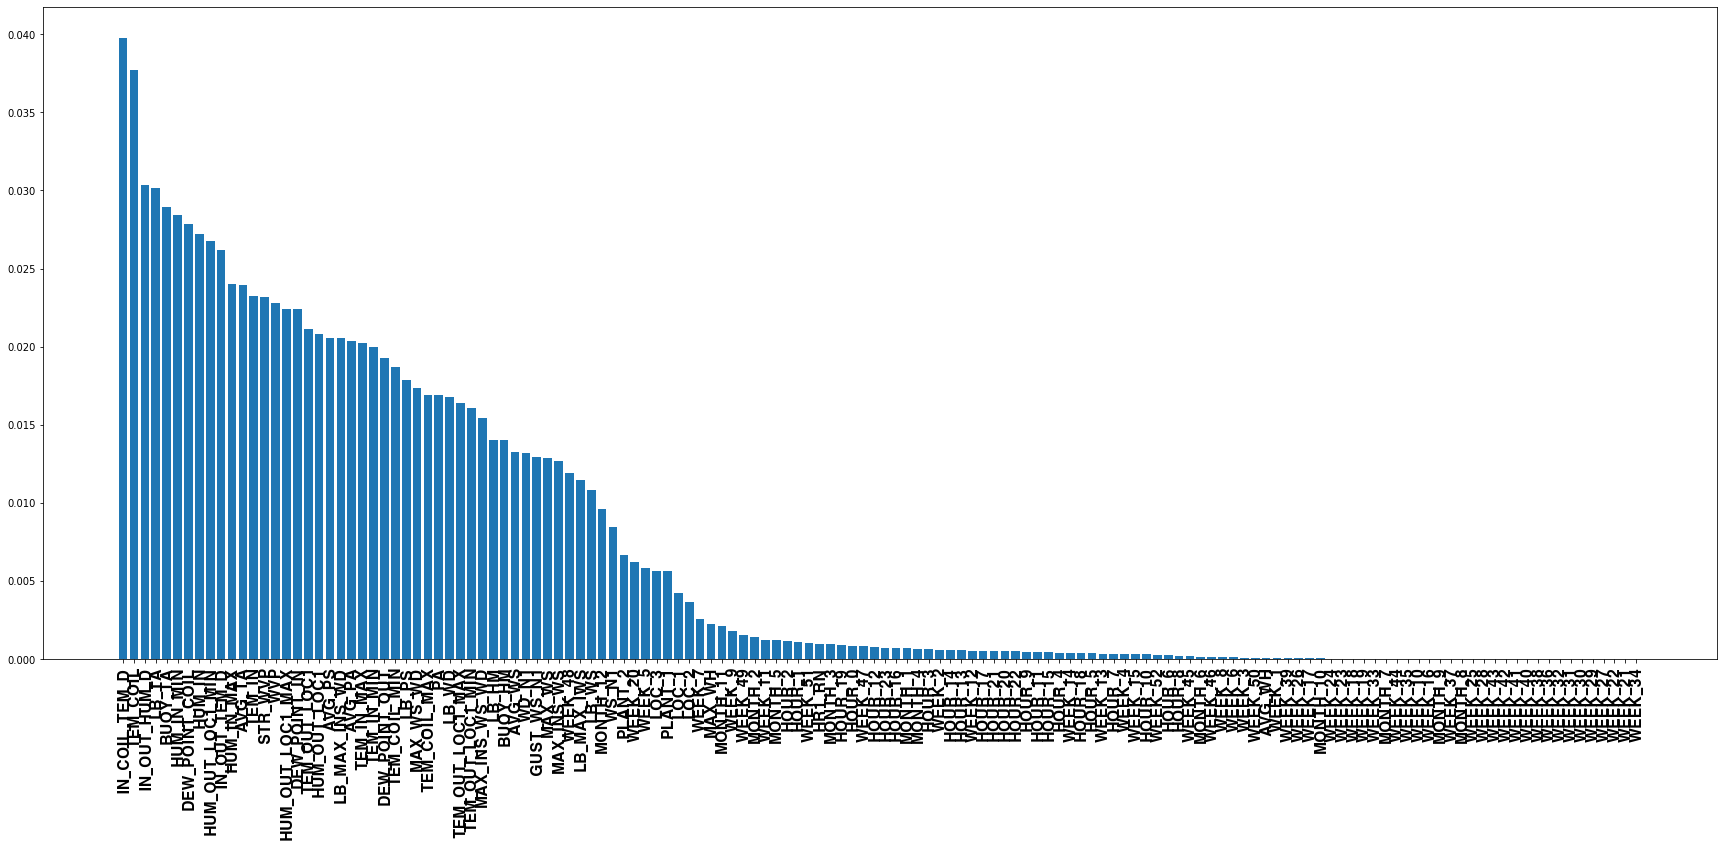

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf24_df.variable, imp_rf24_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

In [150]:
imp_rf24_df.head(30)

,variable,importance
35,IN_COIL_TEM_D,0.0397814
2,TEM_COIL,0.0377128
36,IN_OUT_HUM_D,0.0303493
27,LB_TA,0.0301367
20,BUOY_TA,0.0289378
43,HUM_IN_MIN,0.0284403
31,DEW_POINT_COIL,0.0278542
1,HUM_IN,0.0271938
46,HUM_OUT_LOC1_MIN,0.0267466
34,IN_OUT_TEM_D,0.0261896


## 48시간 결로 예측

In [108]:
from sklearn.ensemble import RandomForestClassifier
rf_model48 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model48.fit(X_train48, y_train48)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [109]:
y_pred48 = rf_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104213
         1.0       0.89      0.81      0.84       583

    accuracy                           1.00    104796
   macro avg       0.94      0.90      0.92    104796
weighted avg       1.00      1.00      1.00    104796



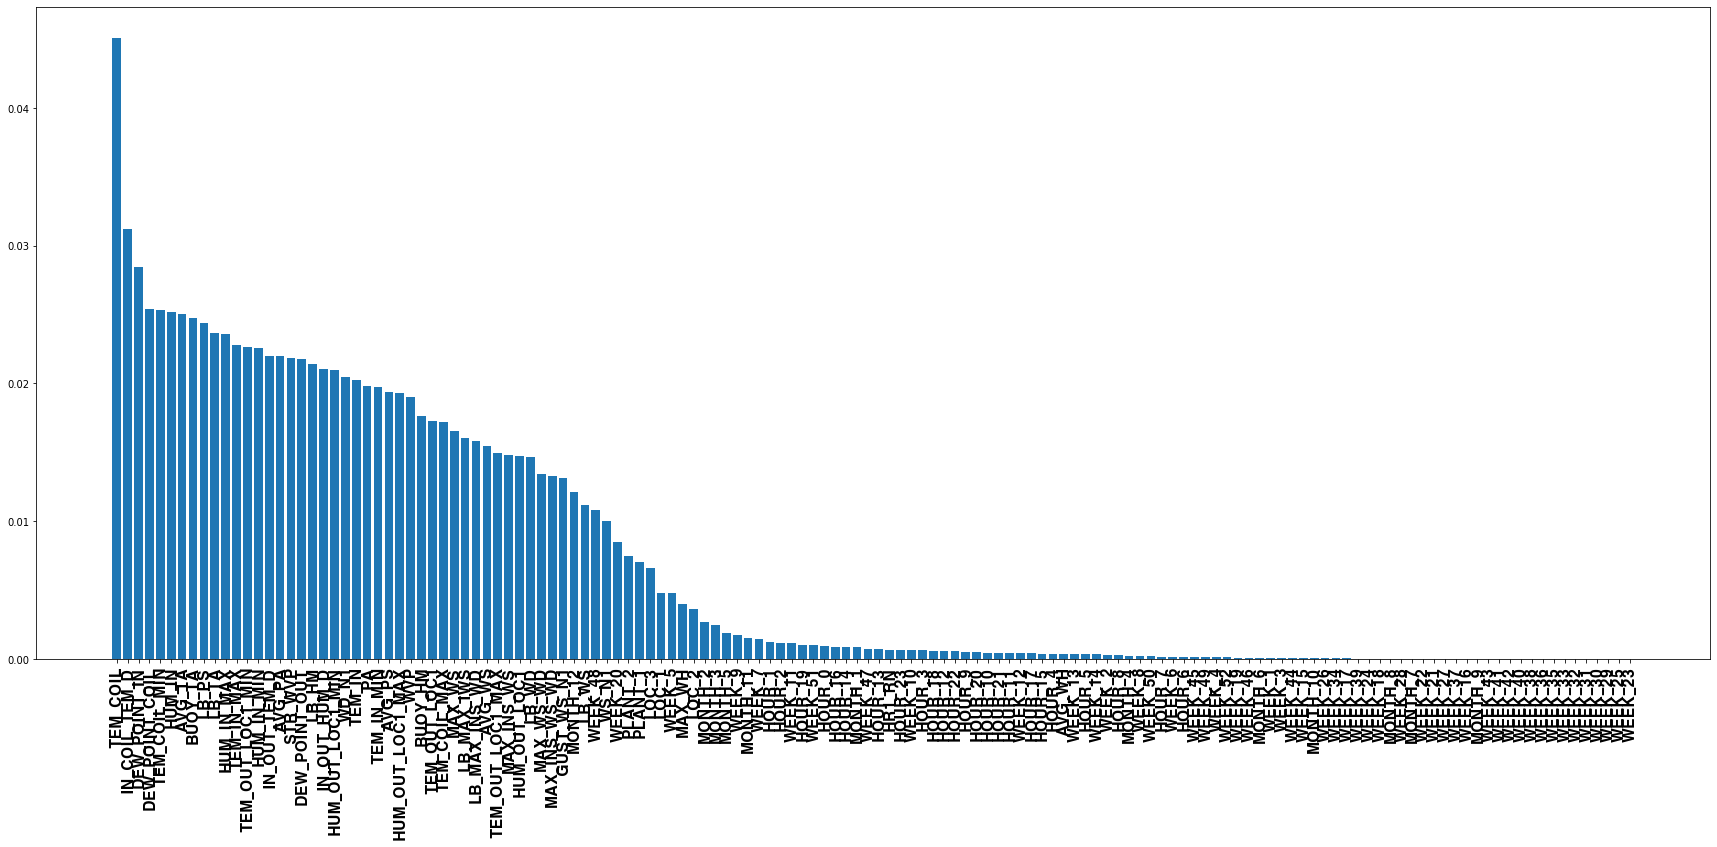

In [110]:
imp_rf48_df = pd.DataFrame(data=np.c_[train_X.columns.values, rf_model48.feature_importances_], columns=['variable', 'importance'])
imp_rf48_df.sort_values(by='importance', ascending=False, inplace=True)
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.font_manager as fm
font_path = "C:/Windows/Fonts/H2GTRE.TTF"
font_prop = fm.FontProperties(fname=font_path, size=15)

plt.figure(figsize=(30,12))
plt.bar(imp_rf48_df.variable, imp_rf48_df.importance)
plt.xticks(rotation=90, fontproperties=font_prop)
plt.show()

In [149]:
imp_rf48_df.head(30)

,variable,importance
2,TEM_COIL,0.0451074
35,IN_COIL_TEM_D,0.0311928
5,DEW_POINT_IN,0.0284508
31,DEW_POINT_COIL,0.0254293
44,TEM_COIL_MIN,0.0253468
1,HUM_IN,0.025184
9,AVG_TA,0.0250478
20,BUOY_TA,0.0247465
28,LB_PS,0.0243859
27,LB_TA,0.0236889


In [158]:
print(imp_rf24_df.head(30))
print("="*50)
print(imp_rf48_df.head(40))

            variable importance
35     IN_COIL_TEM_D  0.0397814
2           TEM_COIL  0.0377128
36      IN_OUT_HUM_D  0.0303493
27             LB_TA  0.0301367
20           BUOY_TA  0.0289378
43        HUM_IN_MIN  0.0284403
31    DEW_POINT_COIL  0.0278542
1             HUM_IN  0.0271938
46  HUM_OUT_LOC1_MIN  0.0267466
34      IN_OUT_TEM_D  0.0261896
38        HUM_IN_MAX  0.0239772
9             AVG_TA  0.0239671
0             TEM_IN  0.0232103
32           STR_WVP  0.0232056
33               WVP  0.0227748
41  HUM_OUT_LOC1_MAX  0.0224227
5       DEW_POINT_IN  0.0224121
3       TEM_OUT_LOC1  0.0211249
4       HUM_OUT_LOC1  0.0207977
7             AVG_PS  0.0205713
25     LB_MAX_INS_WD  0.0205629
6             AVG_PA  0.0203425
37        TEM_IN_MAX  0.0202587
42        TEM_IN_MIN  0.0200056
30     DEW_POINT_OUT  0.0192693
44      TEM_COIL_MIN   0.018722
28             LB_PS  0.0178712
12         MAX_WS_WD  0.0173299
39      TEM_COIL_MAX  0.0169254
18                PA  0.0169024
        

## 검증값 만들기

In [111]:
test

,X24H_COND_LOC,X48H_COND_LOC,TEM_IN,HUM_IN,TEM_COIL,TEM_OUT_LOC1,HUM_OUT_LOC1,DEW_POINT_IN,AVG_PA,AVG_PS,HR1_RN,AVG_TA,AVG_WS,MAX_WS,MAX_WS_WD,MAX_INS_WS,MAX_INS_WS_WD,WD_N1,WS_N1,GUST_WS_N1,PA,BUOY_HM,BUOY_TA,MAX_WH,AVG_WH,LB_WD,LB_WS,LB_MAX_INS_WD,LB_MAX_IWS,LB_TA,LB_PS,LB_HM,DEW_POINT_OUT,DEW_POINT_COIL,STR_WVP,WVP,IN_OUT_TEM_D,IN_COIL_TEM_D,IN_OUT_HUM_D,TEM_IN_MAX,HUM_IN_MAX,TEM_COIL_MAX,TEM_OUT_LOC1_MAX,HUM_OUT_LOC1_MAX,TEM_IN_MIN,HUM_IN_MIN,TEM_COIL_MIN,TEM_OUT_LOC1_MIN,HUM_OUT_LOC1_MIN,PLANT_1,PLANT_2,LOC_1,LOC_2,LOC_3,MONTH_1,MONTH_2,MONTH_3,MONTH_4,MONTH_5,MONTH_6,MONTH_7,MONTH_8,MONTH_9,MONTH_10,MONTH_11,MONTH_12,WEEK_1,WEEK_2,WEEK_3,WEEK_4,WEEK_5,WEEK_6,WEEK_7,WEEK_8,WEEK_9,WEEK_10,WEEK_11,WEEK_12,WEEK_13,WEEK_14,WEEK_15,WEEK_16,WEEK_17,WEEK_18,WEEK_19,WEEK_20,WEEK_21,WEEK_22,WEEK_23,WEEK_24,WEEK_25,WEEK_26,WEEK_27,WEEK_28,WEEK_29,WEEK_30,WEEK_31,WEEK_32,WEEK_33,WEEK_34,WEEK_35,WEEK_36,WEEK_37,WEEK_38,WEEK_39,WEEK_40,WEEK_41,WEEK_42,WEEK_43,WEEK_44,WEEK_45,WEEK_46,WEEK_47,WEEK_48,WEEK_49,WEEK_50,WEEK_51,WEEK_52,HOUR_0,HOUR_1,HOUR_2,HOUR_3,HOUR_4,HOUR_5,HOUR_6,HOUR_7,HOUR_8,HOUR_9,HOUR_10,HOUR_11,HOUR_12,HOUR_13,HOUR_14,HOUR_15,HOUR_16,HOUR_17,HOUR_18,HOUR_19,HOUR_20,HOUR_21,HOUR_22,HOUR_23
0,NaN,NaN,-0.936761,-1.054636,-0.641253,-1.016510,-0.547359,-1.156985,0.719168,0.728424,-0.201451,-0.982463,0.193810,0.036838,1.217634,0.138219,1.473462,1.421462,1.080957,1.183797,0.735323,-1.467916,-0.912763,3.380703,-0.16337,0.963194,1.217574,1.039870,1.535735,-0.821423,0.687035,-1.459530,-1.119164,-0.906625,-0.886225,-0.836873,0.598363,-1.476814,-0.336327,-0.738446,-1.423697,-0.728814,-0.625137,-1.936634,-0.658895,-1.775164,-0.641245,-0.635124,-1.691806,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,NaN,NaN,-0.720865,-0.449353,-0.562858,-0.817131,-0.319514,-0.722579,0.770127,0.774986,-0.201451,-0.787520,0.786256,0.619294,1.489210,0.775478,1.341007,1.513584,0.720434,0.723386,0.653443,-0.960107,-0.925726,1.467332,-0.16337,1.026285,0.963700,0.923601,0.243787,-0.821423,0.651951,-0.669360,-0.826671,-0.587879,-0.759896,-0.753794,0.586896,-0.764695,0.009833,-0.738446,-1.423697,-0.728814,-0.625137,-1.936634,-0.658895,-1.775164,-0.641245,-0.635124,-1.691806,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,NaN,NaN,-0.788188,-1.017843,-0.758277,-0.166248,-1.690616,-1.021676,0.821087,0.821548,-0.201451,-0.592578,1.378701,1.201750,1.760786,1.412737,1.208552,-1.572493,-0.361134,-0.513971,0.910781,-0.887563,-0.834982,1.467332,-0.16337,1.215556,0.093277,0.923601,0.243787,-0.776169,0.897540,-1.657072,-1.100941,-0.982260,-0.800844,-0.781487,-1.993108,-0.070835,1.737950,-0.738446,-1.423697,-0.728814,-0.625137,-1.936634,-0.658895,-1.775164,-0.641245,-0.635124,-1.691806,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,NaN,NaN,-0.455058,-1.508418,-0.554905,-0.159918,-1.885695,-1.009317,0.872047,0.868110,-0.201451,-0.397635,1.971147,1.784207,2.032362,2.049996,1.076097,-1.425098,-0.721656,-0.715401,0.899084,-0.887563,-0.822018,1.467332,-0.16337,1.206543,-0.341934,0.923601,0.243787,-0.753542,0.885845,-1.722919,-1.270482,-1.064378,-0.583907,-0.626876,-0.919062,0.586506,1.475870,-0.738446,-1.423697,-0.728814,-0.625137,-1.936634,-0.658895,-1.775164,-0.641245,-0.635124,-1.691806,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,NaN,NaN,-0.575774,-2.336624,-0.793497,-0.192621,-2.310636,-1.650210,0.707408,0.705143,-0.201451,-0.369337,1.926714,1.824376,1.725850,1.925855,1.422885,0.831883,-0.721656,-0.513971,0.758

In [112]:
validation = etl.makeValiation(test_data, rf_model24, rf_model48, test_X)
validation

C:\Users\silen\Contest_project\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Contest_project\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Contest_project\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,3,2019-04-03 00:00:00,0,2
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,2,2019-04-03 04:30:00,0,3
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,3,2019-04-03 10:30:00,0,3
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,3,2019-04-03 11:00:00,0,4
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,3,2019-04-03 13:30:00,0,3
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,1,2020-03-31 11:30:00,0,1


In [113]:
etl.findCondRow(validation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


In [114]:
etl.findCondRow(validation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


In [115]:
etl.findCondRow(validation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


## 파일 저장하기

In [116]:
etl.save_validation_csv(validation,"rforest")

# LightGBM
## 24시간 결로 예측

In [185]:
from lightgbm import LGBMClassifier
lgbm_model24 = LGBMClassifier(n_estimators=400, random_state=42, boost_from_average=False)
lgbm_model24.fit(X_train, y_train24, early_stopping_rounds=210, eval_metric="auc",
           eval_set=[(X_train, y_train24), (X_val24, y_val24)])

[1]	training's auc: 0.792811	training's binary_logloss: 0.59942	valid_1's auc: 0.796489	valid_1's binary_logloss: 0.599412
Training until validation scores don't improve for 210 rounds
[2]	training's auc: 0.793594	training's binary_logloss: 0.522664	valid_1's auc: 0.797102	valid_1's binary_logloss: 0.522663
[3]	training's auc: 0.793686	training's binary_logloss: 0.458666	valid_1's auc: 0.796961	valid_1's binary_logloss: 0.458658
[4]	training's auc: 0.794157	training's binary_logloss: 0.404576	valid_1's auc: 0.797523	valid_1's binary_logloss: 0.404553
[5]	training's auc: 0.810251	training's binary_logloss: 0.358331	valid_1's auc: 0.818508	valid_1's binary_logloss: 0.358283
[6]	training's auc: 0.811619	training's binary_logloss: 0.318451	valid_1's auc: 0.820154	valid_1's binary_logloss: 0.318377
[7]	training's auc: 0.928724	training's binary_logloss: 0.283795	valid_1's auc: 0.925958	valid_1's binary_logloss: 0.283728
[8]	training's auc: 0.930328	training's binary_logloss: 0.253646	valid_

[71]	training's auc: 0.999775	training's binary_logloss: 0.00383765	valid_1's auc: 0.996621	valid_1's binary_logloss: 0.00582081
[72]	training's auc: 0.99981	training's binary_logloss: 0.00372276	valid_1's auc: 0.996638	valid_1's binary_logloss: 0.00573695
[73]	training's auc: 0.999816	training's binary_logloss: 0.0036199	valid_1's auc: 0.996732	valid_1's binary_logloss: 0.00564361
[74]	training's auc: 0.999874	training's binary_logloss: 0.00352037	valid_1's auc: 0.996748	valid_1's binary_logloss: 0.00558451
[75]	training's auc: 0.999891	training's binary_logloss: 0.00341965	valid_1's auc: 0.996734	valid_1's binary_logloss: 0.00552292
[76]	training's auc: 0.999896	training's binary_logloss: 0.00332376	valid_1's auc: 0.996713	valid_1's binary_logloss: 0.00545658
[77]	training's auc: 0.999904	training's binary_logloss: 0.00324126	valid_1's auc: 0.996741	valid_1's binary_logloss: 0.00539825
[78]	training's auc: 0.99991	training's binary_logloss: 0.00315932	valid_1's auc: 0.996881	valid_1'

[202]	training's auc: 1	training's binary_logloss: 0.000546382	valid_1's auc: 0.997726	valid_1's binary_logloss: 0.00363831
[203]	training's auc: 1	training's binary_logloss: 0.000539982	valid_1's auc: 0.997742	valid_1's binary_logloss: 0.00363696
[204]	training's auc: 1	training's binary_logloss: 0.000531953	valid_1's auc: 0.997743	valid_1's binary_logloss: 0.00363469
[205]	training's auc: 1	training's binary_logloss: 0.000524967	valid_1's auc: 0.997721	valid_1's binary_logloss: 0.00363004
[206]	training's auc: 1	training's binary_logloss: 0.000520375	valid_1's auc: 0.997734	valid_1's binary_logloss: 0.00362645
[207]	training's auc: 1	training's binary_logloss: 0.000514173	valid_1's auc: 0.997753	valid_1's binary_logloss: 0.00361949
[208]	training's auc: 1	training's binary_logloss: 0.000507848	valid_1's auc: 0.997761	valid_1's binary_logloss: 0.00361263
[209]	training's auc: 1	training's binary_logloss: 0.000502847	valid_1's auc: 0.997751	valid_1's binary_logloss: 0.00361524
[210]	tr

[273]	training's auc: 1	training's binary_logloss: 0.000246353	valid_1's auc: 0.998008	valid_1's binary_logloss: 0.00360475
[274]	training's auc: 1	training's binary_logloss: 0.000243721	valid_1's auc: 0.998012	valid_1's binary_logloss: 0.00360891
[275]	training's auc: 1	training's binary_logloss: 0.000240621	valid_1's auc: 0.998037	valid_1's binary_logloss: 0.00360097
[276]	training's auc: 1	training's binary_logloss: 0.000237461	valid_1's auc: 0.998041	valid_1's binary_logloss: 0.0035962
[277]	training's auc: 1	training's binary_logloss: 0.000235038	valid_1's auc: 0.998044	valid_1's binary_logloss: 0.00359262
[278]	training's auc: 1	training's binary_logloss: 0.000233058	valid_1's auc: 0.998012	valid_1's binary_logloss: 0.00359218
[279]	training's auc: 1	training's binary_logloss: 0.00023053	valid_1's auc: 0.998015	valid_1's binary_logloss: 0.0036024
[280]	training's auc: 1	training's binary_logloss: 0.000227859	valid_1's auc: 0.99802	valid_1's binary_logloss: 0.00360707
[281]	traini

[344]	training's auc: 1	training's binary_logloss: 0.000111367	valid_1's auc: 0.997978	valid_1's binary_logloss: 0.0037894
[345]	training's auc: 1	training's binary_logloss: 0.000110332	valid_1's auc: 0.997981	valid_1's binary_logloss: 0.00380192
[346]	training's auc: 1	training's binary_logloss: 0.000109027	valid_1's auc: 0.998002	valid_1's binary_logloss: 0.00380713
[347]	training's auc: 1	training's binary_logloss: 0.000107543	valid_1's auc: 0.998009	valid_1's binary_logloss: 0.00380615
[348]	training's auc: 1	training's binary_logloss: 0.000106576	valid_1's auc: 0.998013	valid_1's binary_logloss: 0.0038081
[349]	training's auc: 1	training's binary_logloss: 0.000105019	valid_1's auc: 0.997997	valid_1's binary_logloss: 0.00381382
[350]	training's auc: 1	training's binary_logloss: 0.000104235	valid_1's auc: 0.998016	valid_1's binary_logloss: 0.00381808
[351]	training's auc: 1	training's binary_logloss: 0.000103465	valid_1's auc: 0.998015	valid_1's binary_logloss: 0.00382305
[352]	trai

LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=400,
               n_jobs=-1, num_leaves=31, objective=None, random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [186]:
y_pred24 = lgbm_model24.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104215
         1.0       0.90      0.87      0.88       581

    accuracy                           1.00    104796
   macro avg       0.95      0.93      0.94    104796
weighted avg       1.00      1.00      1.00    104796



In [193]:
lgbm_model24 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_model24.fit(X_train24, y_train24, early_stopping_rounds=260, eval_metric="auc",
           eval_set=[(X_train24, y_train24), (X_val24, y_val24)])

lgbm_roc_score = roc_auc_score(y_val24, lgbm_model24.predict_proba(X_val24)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))
y_pred24 = lgbm_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

[1]	training's auc: 0.958217	training's binary_logloss: 0.599307	valid_1's auc: 0.950154	valid_1's binary_logloss: 0.599288
Training until validation scores don't improve for 260 rounds
[2]	training's auc: 0.968846	training's binary_logloss: 0.522413	valid_1's auc: 0.961901	valid_1's binary_logloss: 0.52237
[3]	training's auc: 0.977598	training's binary_logloss: 0.45826	valid_1's auc: 0.96992	valid_1's binary_logloss: 0.458244
[4]	training's auc: 0.98473	training's binary_logloss: 0.403902	valid_1's auc: 0.979572	valid_1's binary_logloss: 0.403913
[5]	training's auc: 0.986502	training's binary_logloss: 0.357544	valid_1's auc: 0.981269	valid_1's binary_logloss: 0.357561
[6]	training's auc: 0.98688	training's binary_logloss: 0.317486	valid_1's auc: 0.981523	valid_1's binary_logloss: 0.317553
[7]	training's auc: 0.987755	training's binary_logloss: 0.28274	valid_1's auc: 0.984729	valid_1's binary_logloss: 0.282819
[8]	training's auc: 0.988171	training's binary_logloss: 0.252438	valid_1's a

[69]	training's auc: 0.999965	training's binary_logloss: 0.00257202	valid_1's auc: 0.997732	valid_1's binary_logloss: 0.00460676
[70]	training's auc: 0.99997	training's binary_logloss: 0.00246007	valid_1's auc: 0.997765	valid_1's binary_logloss: 0.0045376
[71]	training's auc: 0.999974	training's binary_logloss: 0.00235413	valid_1's auc: 0.99794	valid_1's binary_logloss: 0.00445657
[72]	training's auc: 0.999978	training's binary_logloss: 0.00225696	valid_1's auc: 0.998107	valid_1's binary_logloss: 0.00437342
[73]	training's auc: 0.99998	training's binary_logloss: 0.00216073	valid_1's auc: 0.998062	valid_1's binary_logloss: 0.00429753
[74]	training's auc: 0.999983	training's binary_logloss: 0.00207624	valid_1's auc: 0.998079	valid_1's binary_logloss: 0.00422848
[75]	training's auc: 0.999986	training's binary_logloss: 0.00199175	valid_1's auc: 0.998091	valid_1's binary_logloss: 0.00420144
[76]	training's auc: 0.999988	training's binary_logloss: 0.00192097	valid_1's auc: 0.998045	valid_1's

[136]	training's auc: 1	training's binary_logloss: 0.000362855	valid_1's auc: 0.998281	valid_1's binary_logloss: 0.00329268
[137]	training's auc: 1	training's binary_logloss: 0.000352936	valid_1's auc: 0.998283	valid_1's binary_logloss: 0.00329839
[138]	training's auc: 1	training's binary_logloss: 0.000343547	valid_1's auc: 0.998348	valid_1's binary_logloss: 0.00329388
[139]	training's auc: 1	training's binary_logloss: 0.000335515	valid_1's auc: 0.998331	valid_1's binary_logloss: 0.00329795
[140]	training's auc: 1	training's binary_logloss: 0.000328928	valid_1's auc: 0.998336	valid_1's binary_logloss: 0.00330328
[141]	training's auc: 1	training's binary_logloss: 0.000322885	valid_1's auc: 0.998375	valid_1's binary_logloss: 0.00329912
[142]	training's auc: 1	training's binary_logloss: 0.000315951	valid_1's auc: 0.998389	valid_1's binary_logloss: 0.00329701
[143]	training's auc: 1	training's binary_logloss: 0.000309204	valid_1's auc: 0.998428	valid_1's binary_logloss: 0.00329424
[144]	tr

[203]	training's auc: 1	training's binary_logloss: 7.67708e-05	valid_1's auc: 0.998452	valid_1's binary_logloss: 0.00355981
[204]	training's auc: 1	training's binary_logloss: 7.47703e-05	valid_1's auc: 0.998506	valid_1's binary_logloss: 0.00356024
[205]	training's auc: 1	training's binary_logloss: 7.30491e-05	valid_1's auc: 0.998489	valid_1's binary_logloss: 0.00357063
[206]	training's auc: 1	training's binary_logloss: 7.1454e-05	valid_1's auc: 0.998465	valid_1's binary_logloss: 0.00357247
[207]	training's auc: 1	training's binary_logloss: 6.98996e-05	valid_1's auc: 0.998447	valid_1's binary_logloss: 0.00358337
[208]	training's auc: 1	training's binary_logloss: 6.83604e-05	valid_1's auc: 0.998435	valid_1's binary_logloss: 0.00359413
[209]	training's auc: 1	training's binary_logloss: 6.69202e-05	valid_1's auc: 0.998451	valid_1's binary_logloss: 0.00360181
[210]	training's auc: 1	training's binary_logloss: 6.5491e-05	valid_1's auc: 0.998487	valid_1's binary_logloss: 0.0036046
[211]	train

[338]	training's auc: 1	training's binary_logloss: 3.9636e-06	valid_1's auc: 0.998159	valid_1's binary_logloss: 0.00471041
[339]	training's auc: 1	training's binary_logloss: 3.86435e-06	valid_1's auc: 0.998186	valid_1's binary_logloss: 0.00471379
[340]	training's auc: 1	training's binary_logloss: 3.77626e-06	valid_1's auc: 0.998168	valid_1's binary_logloss: 0.00472093
[341]	training's auc: 1	training's binary_logloss: 3.68487e-06	valid_1's auc: 0.998158	valid_1's binary_logloss: 0.004739
[342]	training's auc: 1	training's binary_logloss: 3.59333e-06	valid_1's auc: 0.998162	valid_1's binary_logloss: 0.00475058
[343]	training's auc: 1	training's binary_logloss: 3.49444e-06	valid_1's auc: 0.99813	valid_1's binary_logloss: 0.00476155
[344]	training's auc: 1	training's binary_logloss: 3.41841e-06	valid_1's auc: 0.998125	valid_1's binary_logloss: 0.0047704
[345]	training's auc: 1	training's binary_logloss: 3.34715e-06	valid_1's auc: 0.998111	valid_1's binary_logloss: 0.00478445
[346]	trainin

NameError: name 'roc_auc_score' is not defined

## 48시간 결로 예측

In [178]:
from lightgbm import LGBMClassifier
lgbm_model48 = LGBMClassifier(n_estimators=250, random_state=42, boost_from_average=False)
lgbm_model48.fit(X_train48, y_train48, early_stopping_rounds=210, eval_metric="auc",
           eval_set=[(X_train48, y_train48), (X_val48, y_val48)])

[1]	training's auc: 0.792079	training's binary_logloss: 0.599228	valid_1's auc: 0.778481	valid_1's binary_logloss: 0.599287
Training until validation scores don't improve for 210 rounds
[2]	training's auc: 0.794938	training's binary_logloss: 0.522303	valid_1's auc: 0.781136	valid_1's binary_logloss: 0.522425
[3]	training's auc: 0.799507	training's binary_logloss: 0.45817	valid_1's auc: 0.787474	valid_1's binary_logloss: 0.458361
[4]	training's auc: 0.855951	training's binary_logloss: 0.403883	valid_1's auc: 0.843523	valid_1's binary_logloss: 0.404117
[5]	training's auc: 0.85607	training's binary_logloss: 0.357558	valid_1's auc: 0.84363	valid_1's binary_logloss: 0.357847
[6]	training's auc: 0.854991	training's binary_logloss: 0.317611	valid_1's auc: 0.842597	valid_1's binary_logloss: 0.317928
[7]	training's auc: 0.926771	training's binary_logloss: 0.28307	valid_1's auc: 0.899394	valid_1's binary_logloss: 0.283431
[8]	training's auc: 0.928158	training's binary_logloss: 0.25286	valid_1's 

[68]	training's auc: 0.994615	training's binary_logloss: 0.00422632	valid_1's auc: 0.986935	valid_1's binary_logloss: 0.00652917
[69]	training's auc: 0.995144	training's binary_logloss: 0.00416236	valid_1's auc: 0.986892	valid_1's binary_logloss: 0.0065014
[70]	training's auc: 0.995145	training's binary_logloss: 0.00404453	valid_1's auc: 0.987016	valid_1's binary_logloss: 0.00639979
[71]	training's auc: 0.999078	training's binary_logloss: 0.00646155	valid_1's auc: 0.988215	valid_1's binary_logloss: 0.0094495
[72]	training's auc: 0.99502	training's binary_logloss: 0.00459448	valid_1's auc: 0.987473	valid_1's binary_logloss: 0.00634945
[73]	training's auc: 0.995035	training's binary_logloss: 0.00448724	valid_1's auc: 0.98784	valid_1's binary_logloss: 0.00624203
[74]	training's auc: 0.995046	training's binary_logloss: 0.00437904	valid_1's auc: 0.988042	valid_1's binary_logloss: 0.00613526
[75]	training's auc: 0.994908	training's binary_logloss: 0.00769639	valid_1's auc: 0.987793	valid_1's

[136]	training's auc: 0.995475	training's binary_logloss: 0.00767349	valid_1's auc: 0.986554	valid_1's binary_logloss: 0.0224875
[137]	training's auc: 0.993912	training's binary_logloss: 0.0613188	valid_1's auc: 0.986023	valid_1's binary_logloss: 0.0815545
[138]	training's auc: 0.995366	training's binary_logloss: 0.0119678	valid_1's auc: 0.986464	valid_1's binary_logloss: 0.0283571
[139]	training's auc: 0.992904	training's binary_logloss: 0.0958762	valid_1's auc: 0.984091	valid_1's binary_logloss: 0.111579
[140]	training's auc: 0.995517	training's binary_logloss: 0.00869276	valid_1's auc: 0.986763	valid_1's binary_logloss: 0.0226046
[141]	training's auc: 0.995507	training's binary_logloss: 0.009043	valid_1's auc: 0.986825	valid_1's binary_logloss: 0.0210045
[142]	training's auc: 0.995623	training's binary_logloss: 0.00508179	valid_1's auc: 0.987049	valid_1's binary_logloss: 0.0159333
[143]	training's auc: 0.99563	training's binary_logloss: 0.00518007	valid_1's auc: 0.987105	valid_1's b

LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=250,
               n_jobs=-1, num_leaves=31, objective=None, random_state=42,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [194]:
lgbm_model48 = LGBMClassifier(n_estimators=1000, random_state=42, boost_from_average=False, max_depth=128, min_child_samples= 60, num_leaves =64,subsample=0.8 )
lgbm_model48.fit(X_train24, y_train24, early_stopping_rounds=260, eval_metric="auc",
           eval_set=[(X_train24, y_train24), (X_val24, y_val24)])

lgbm_roc_score = roc_auc_score(y_val24, lgbm_model48.predict_proba(X_val24)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	training's auc: 0.958217	training's binary_logloss: 0.599307	valid_1's auc: 0.950154	valid_1's binary_logloss: 0.599288
Training until validation scores don't improve for 260 rounds
[2]	training's auc: 0.968846	training's binary_logloss: 0.522413	valid_1's auc: 0.961901	valid_1's binary_logloss: 0.52237
[3]	training's auc: 0.977598	training's binary_logloss: 0.45826	valid_1's auc: 0.96992	valid_1's binary_logloss: 0.458244
[4]	training's auc: 0.98473	training's binary_logloss: 0.403902	valid_1's auc: 0.979572	valid_1's binary_logloss: 0.403913
[5]	training's auc: 0.986502	training's binary_logloss: 0.357544	valid_1's auc: 0.981269	valid_1's binary_logloss: 0.357561
[6]	training's auc: 0.98688	training's binary_logloss: 0.317486	valid_1's auc: 0.981523	valid_1's binary_logloss: 0.317553
[7]	training's auc: 0.987755	training's binary_logloss: 0.28274	valid_1's auc: 0.984729	valid_1's binary_logloss: 0.282819
[8]	training's auc: 0.988171	training's binary_logloss: 0.252438	valid_1's a

[66]	training's auc: 0.999947	training's binary_logloss: 0.00294015	valid_1's auc: 0.997836	valid_1's binary_logloss: 0.00486537
[67]	training's auc: 0.999957	training's binary_logloss: 0.00280886	valid_1's auc: 0.997795	valid_1's binary_logloss: 0.00478254
[68]	training's auc: 0.999961	training's binary_logloss: 0.00268642	valid_1's auc: 0.997778	valid_1's binary_logloss: 0.00468148
[69]	training's auc: 0.999965	training's binary_logloss: 0.00257202	valid_1's auc: 0.997732	valid_1's binary_logloss: 0.00460676
[70]	training's auc: 0.99997	training's binary_logloss: 0.00246007	valid_1's auc: 0.997765	valid_1's binary_logloss: 0.0045376
[71]	training's auc: 0.999974	training's binary_logloss: 0.00235413	valid_1's auc: 0.99794	valid_1's binary_logloss: 0.00445657
[72]	training's auc: 0.999978	training's binary_logloss: 0.00225696	valid_1's auc: 0.998107	valid_1's binary_logloss: 0.00437342
[73]	training's auc: 0.99998	training's binary_logloss: 0.00216073	valid_1's auc: 0.998062	valid_1's

[198]	training's auc: 1	training's binary_logloss: 8.50424e-05	valid_1's auc: 0.998544	valid_1's binary_logloss: 0.0035294
[199]	training's auc: 1	training's binary_logloss: 8.31188e-05	valid_1's auc: 0.998533	valid_1's binary_logloss: 0.00352971
[200]	training's auc: 1	training's binary_logloss: 8.14262e-05	valid_1's auc: 0.998509	valid_1's binary_logloss: 0.00353887
[201]	training's auc: 1	training's binary_logloss: 7.98957e-05	valid_1's auc: 0.99849	valid_1's binary_logloss: 0.0035413
[202]	training's auc: 1	training's binary_logloss: 7.82975e-05	valid_1's auc: 0.998479	valid_1's binary_logloss: 0.00355307
[203]	training's auc: 1	training's binary_logloss: 7.67708e-05	valid_1's auc: 0.998452	valid_1's binary_logloss: 0.00355981
[204]	training's auc: 1	training's binary_logloss: 7.47703e-05	valid_1's auc: 0.998506	valid_1's binary_logloss: 0.00356024
[205]	training's auc: 1	training's binary_logloss: 7.30491e-05	valid_1's auc: 0.998489	valid_1's binary_logloss: 0.00357063
[206]	train

[265]	training's auc: 1	training's binary_logloss: 1.96352e-05	valid_1's auc: 0.998208	valid_1's binary_logloss: 0.00400732
[266]	training's auc: 1	training's binary_logloss: 1.92245e-05	valid_1's auc: 0.998214	valid_1's binary_logloss: 0.00401644
[267]	training's auc: 1	training's binary_logloss: 1.87055e-05	valid_1's auc: 0.998222	valid_1's binary_logloss: 0.00401817
[268]	training's auc: 1	training's binary_logloss: 1.83783e-05	valid_1's auc: 0.998228	valid_1's binary_logloss: 0.00402791
[269]	training's auc: 1	training's binary_logloss: 1.79251e-05	valid_1's auc: 0.998215	valid_1's binary_logloss: 0.00404498
[270]	training's auc: 1	training's binary_logloss: 1.74869e-05	valid_1's auc: 0.998183	valid_1's binary_logloss: 0.00405689
[271]	training's auc: 1	training's binary_logloss: 1.70936e-05	valid_1's auc: 0.998162	valid_1's binary_logloss: 0.00406953
[272]	training's auc: 1	training's binary_logloss: 1.66538e-05	valid_1's auc: 0.998195	valid_1's binary_logloss: 0.00407109
[273]	tr

[332]	training's auc: 1	training's binary_logloss: 4.49341e-06	valid_1's auc: 0.998141	valid_1's binary_logloss: 0.00463632
[333]	training's auc: 1	training's binary_logloss: 4.40129e-06	valid_1's auc: 0.998143	valid_1's binary_logloss: 0.00464802
[334]	training's auc: 1	training's binary_logloss: 4.29288e-06	valid_1's auc: 0.998164	valid_1's binary_logloss: 0.00466041
[335]	training's auc: 1	training's binary_logloss: 4.21626e-06	valid_1's auc: 0.998171	valid_1's binary_logloss: 0.00467395
[336]	training's auc: 1	training's binary_logloss: 4.12971e-06	valid_1's auc: 0.99815	valid_1's binary_logloss: 0.00468386
[337]	training's auc: 1	training's binary_logloss: 4.06177e-06	valid_1's auc: 0.998139	valid_1's binary_logloss: 0.00469975
[338]	training's auc: 1	training's binary_logloss: 3.9636e-06	valid_1's auc: 0.998159	valid_1's binary_logloss: 0.00471041
[339]	training's auc: 1	training's binary_logloss: 3.86435e-06	valid_1's auc: 0.998186	valid_1's binary_logloss: 0.00471379
[340]	trai

NameError: name 'roc_auc_score' is not defined

In [179]:
y_pred48 = lgbm_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104213
         1.0       0.84      0.76      0.80       583

    accuracy                           1.00    104796
   macro avg       0.92      0.88      0.90    104796
weighted avg       1.00      1.00      1.00    104796



In [132]:
y_pred48 = lgbm_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104213
         1.0       0.82      0.78      0.80       583

    accuracy                           1.00    104796
   macro avg       0.91      0.89      0.90    104796
weighted avg       1.00      1.00      1.00    104796



## 검증값 만들기

In [195]:
lgValiation =etl.makeValiation(test_data,lgbm_model24,lgbm_model48, test_X)
lgValiation

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,0,2019-04-03 00:00:00,0,0
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,0,2019-04-03 04:30:00,0,0
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,0,2019-04-03 10:30:00,0,0
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,0,2019-04-03 11:00:00,0,0
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,0,2019-04-03 13:30:00,0,0
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,0,2020-03-31 03:00:00,0,0
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,0,2020-03-31 05:00:00,0,0
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,0,2020-03-31 07:00:00,0,0
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,0,2020-03-31 11:30:00,0,0


In [196]:
etl.findCondRow(lgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2435,2019-12-22 12:30:00,1,2,2019-12-23 12:30:00,1,77,2019-12-24 12:30:00,1,77


In [197]:
etl.findCondRow(lgValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2435,2019-12-22 12:30:00,1,2,2019-12-23 12:30:00,1,77,2019-12-24 12:30:00,1,77


In [198]:
etl.findCondRow(lgValiation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2435,2019-12-22 12:30:00,1,2,2019-12-23 12:30:00,1,77,2019-12-24 12:30:00,1,77


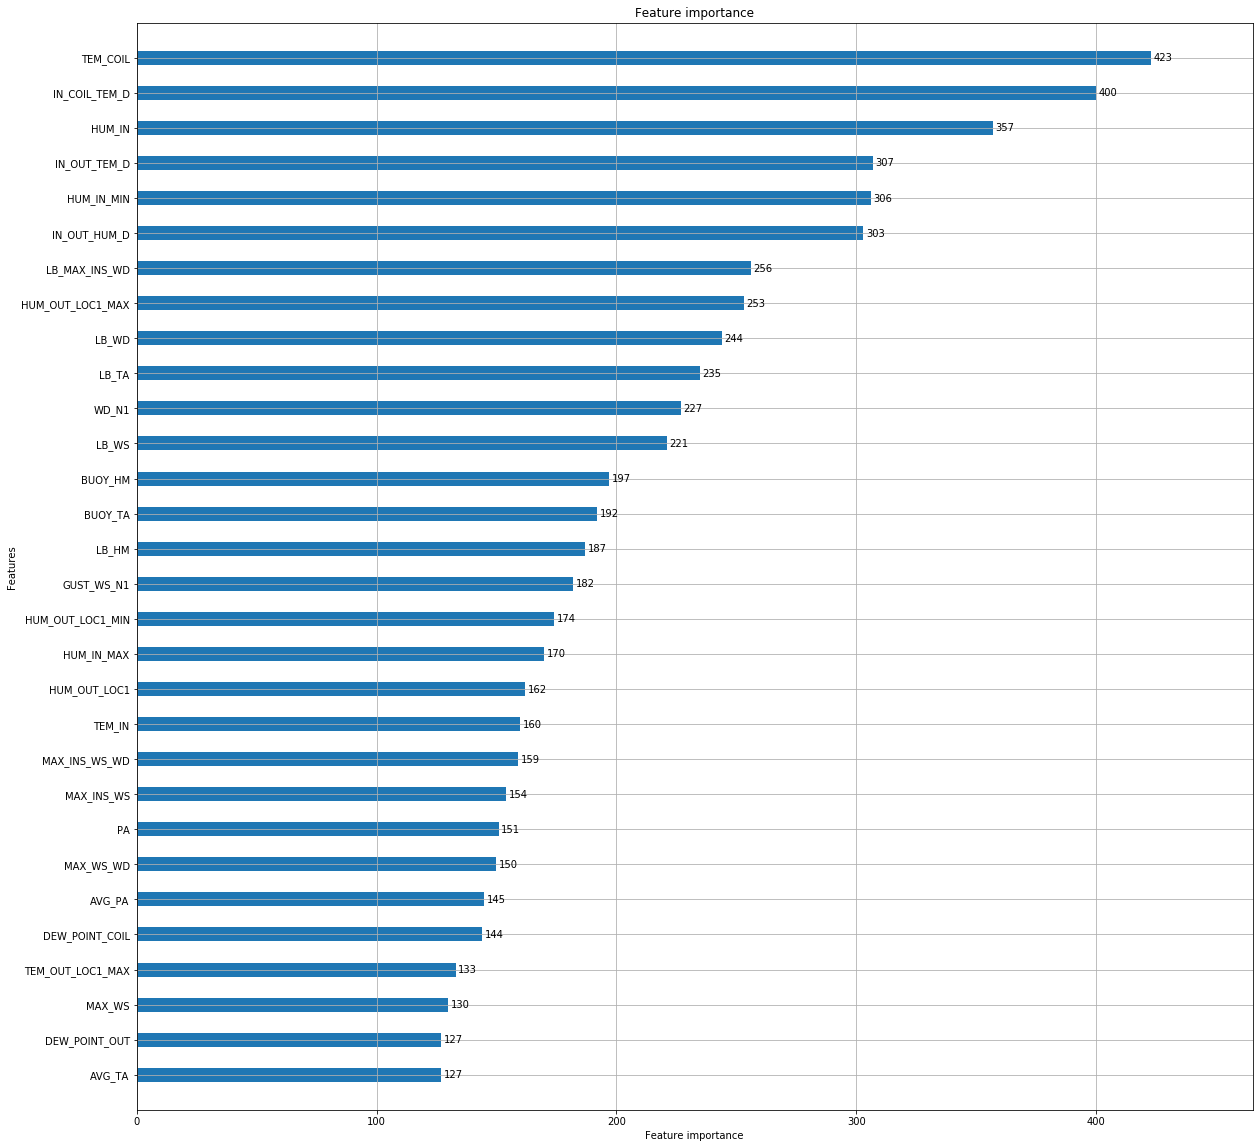

In [200]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(lgbm_model24, ax=ax,  max_num_features=30,height=0.4)

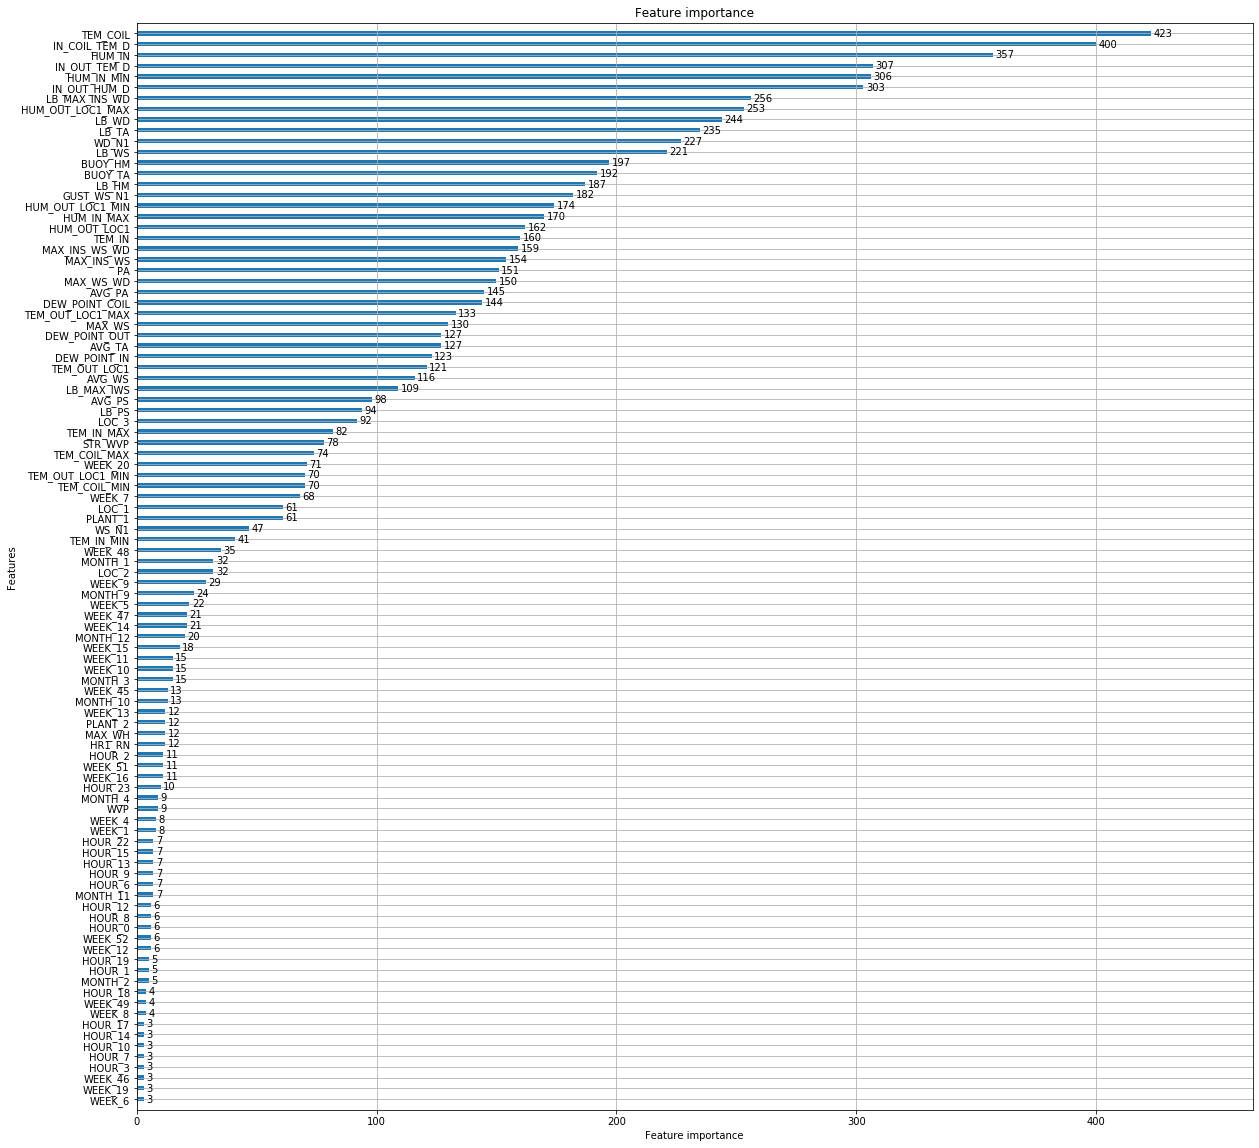

In [202]:
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(lgbm_model48, ax=ax,  max_num_features=100,height=0.4)

## 파일 저장하기

In [ ]:
etl.save_validation_csv(lgValiation,"lgbm")

# XGBOOST
## 24시간 결로 예측

In [137]:
from xgboost import XGBClassifier
xgb_model24 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\silen\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [138]:
y_pred24 = xgb_model24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104215
         1.0       0.92      0.64      0.76       581

    accuracy                           1.00    104796
   macro avg       0.96      0.82      0.88    104796
weighted avg       1.00      1.00      1.00    104796



## 48시간 결로 예측

In [139]:
from xgboost import XGBClassifier
xgb_model48 = XGBClassifier(max_depth=10, learning_rate=0.01, n_estimators=100, random_state=42)
xgb_model48.fit(X_train48, y_train48)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.01, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [140]:
y_pred48 = xgb_model48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    104213
         1.0       0.93      0.66      0.77       583

    accuracy                           1.00    104796
   macro avg       0.96      0.83      0.89    104796
weighted avg       1.00      1.00      1.00    104796



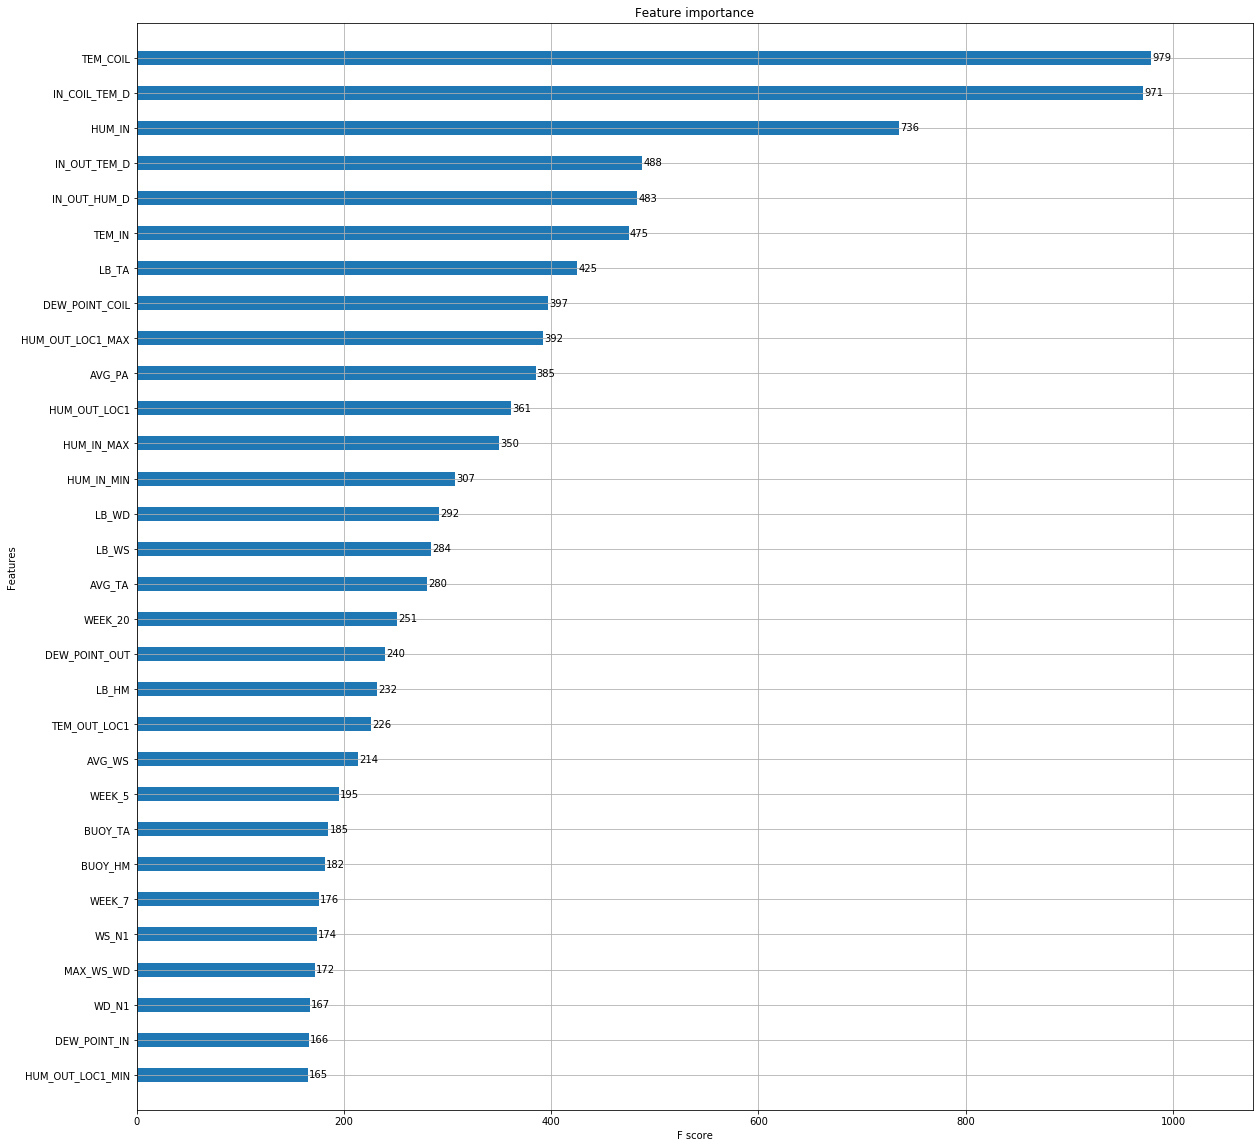

In [162]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(xgb_model24, ax=ax,  max_num_features=30,height=0.4)

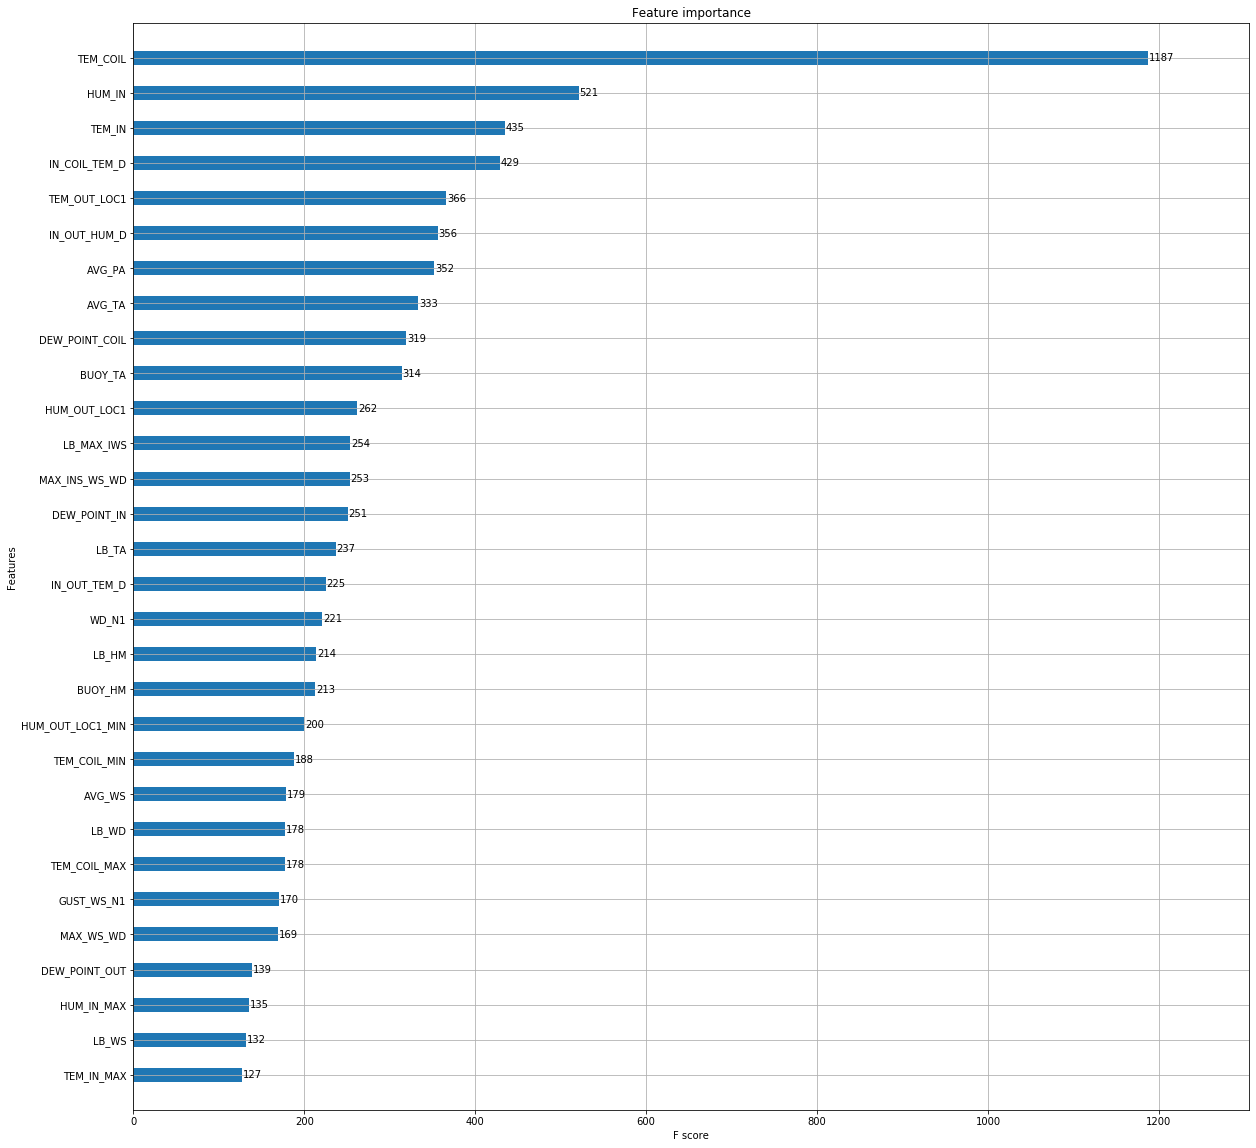

In [163]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(20, 20))

plot_importance(xgb_model48, ax=ax,  max_num_features=30,height=0.4)

## 검증 값 만들기

In [141]:
xgValiation=etl.makeValiation(test_data,xgb_model24,xgb_model48,test_X)
xgValiation

C:\Users\silen\Contest_project\Weather-Bigdata-Contest\module\etl.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC"] = predict24.astype(int)
C:\Users\silen\Contest_project\Weather-Bigdata-Contest\module\etl.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation["X24H_COND_LOC_PROB"] = (predict24_proba[:,1]*100).astype(int)
C:\Users\silen\Contest_project\Weather-Bigdata-Contest\module\etl.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
0,2019-04-01 00:00:00,2,3,2019-04-02 00:00:00,0,18,2019-04-03 00:00:00,0,18
1,2019-04-01 04:30:00,1,2,2019-04-02 04:30:00,0,18,2019-04-03 04:30:00,0,18
2,2019-04-01 10:30:00,2,3,2019-04-02 10:30:00,0,18,2019-04-03 10:30:00,0,18
3,2019-04-01 11:00:00,1,1,2019-04-02 11:00:00,0,18,2019-04-03 11:00:00,0,18
4,2019-04-01 13:30:00,2,1,2019-04-02 13:30:00,0,18,2019-04-03 13:30:00,0,18
...,...,...,...,...,...,...,...,...,...
3534,2020-03-29 03:00:00,1,2,2020-03-30 03:00:00,0,18,2020-03-31 03:00:00,0,18
3535,2020-03-29 05:00:00,2,3,2020-03-30 05:00:00,0,18,2020-03-31 05:00:00,0,18
3536,2020-03-29 07:00:00,2,1,2020-03-30 07:00:00,0,18,2020-03-31 07:00:00,0,18
3537,2020-03-29 11:30:00,1,1,2020-03-30 11:30:00,0,18,2020-03-31 11:30:00,0,18


In [142]:
etl.findCondRow(xgValiation)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
67,2019-04-07 13:30:00,2,2,2019-04-08 13:30:00,1,56,2019-04-09 13:30:00,0,18
2378,2019-12-16 13:00:00,1,3,2019-12-17 13:00:00,1,51,2019-12-18 13:00:00,0,18
3015,2020-02-11 15:00:00,1,2,2020-02-12 15:00:00,1,53,2020-02-13 15:00:00,0,19
3025,2020-02-11 17:30:00,1,2,2020-02-12 17:30:00,1,57,2020-02-13 17:30:00,0,19
3026,2020-02-11 17:30:00,1,3,2020-02-12 17:30:00,1,57,2020-02-13 17:30:00,0,19


In [143]:
etl.findCondRow(xgValiation,48)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB
2805,2020-01-11 00:30:00,2,3,2020-01-12 00:30:00,0,18,2020-01-13 00:30:00,1,70
3308,2020-03-06 10:00:00,2,2,2020-03-07 10:00:00,0,18,2020-03-08 10:00:00,1,60
3309,2020-03-06 11:00:00,2,1,2020-03-07 11:00:00,0,18,2020-03-08 11:00:00,1,60
3310,2020-03-06 12:30:00,2,1,2020-03-07 12:30:00,0,18,2020-03-08 12:30:00,1,60


In [144]:
etl.findCondRow(xgValiation,1)

,MEA_DDHR,PLANT,LOC,X24H_TMA,X24H_COND_LOC,X24H_COND_LOC_PROB,X48H_TMA,X48H_COND_LOC,X48H_COND_LOC_PROB


## 파일 저장하기

In [145]:
etl.save_validation_csv(xgValiation,"xgboost")

# KNN
## 24시간 결로 예측

In [146]:
from sklearn.neighbors import KNeighborsClassifier
neigh24 = KNeighborsClassifier(n_neighbors=3)
neigh24.fit(X_train24, y_train24)

C:\Users\silen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [147]:
y_pred24 = neigh24.predict(X_val24)
from sklearn.metrics import classification_report
print(classification_report(y_val24, y_pred24))

KeyboardInterrupt: 

## 48시간 결로 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh48 = KNeighborsClassifier(n_neighbors=3)
neigh48.fit(X_train48, y_train48)

In [ ]:
y_pred48 = neigh48.predict(X_val48)
from sklearn.metrics import classification_report
print(classification_report(y_val48, y_pred48))

## 검증값 만들기

In [ ]:
knnValiation=etl.makeValiation(test_data,neigh24,neigh48,test_X)
knnValiation

In [ ]:
etl.findCondRow(knnValiation)

In [ ]:
etl.findCondRow(knnValiation,48)

In [ ]:
etl.findCondRow(knnValiation,1)

## 파일 저장하기

In [ ]:
etl.save_validation_csv(xgValiation,"knn")